# California Housing Price Prediction

Downlaod the data from here [https://www.kaggle.com/subashdump/california-housing-price-prediction](https://www.kaggle.com/subashdump/california-housing-price-prediction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

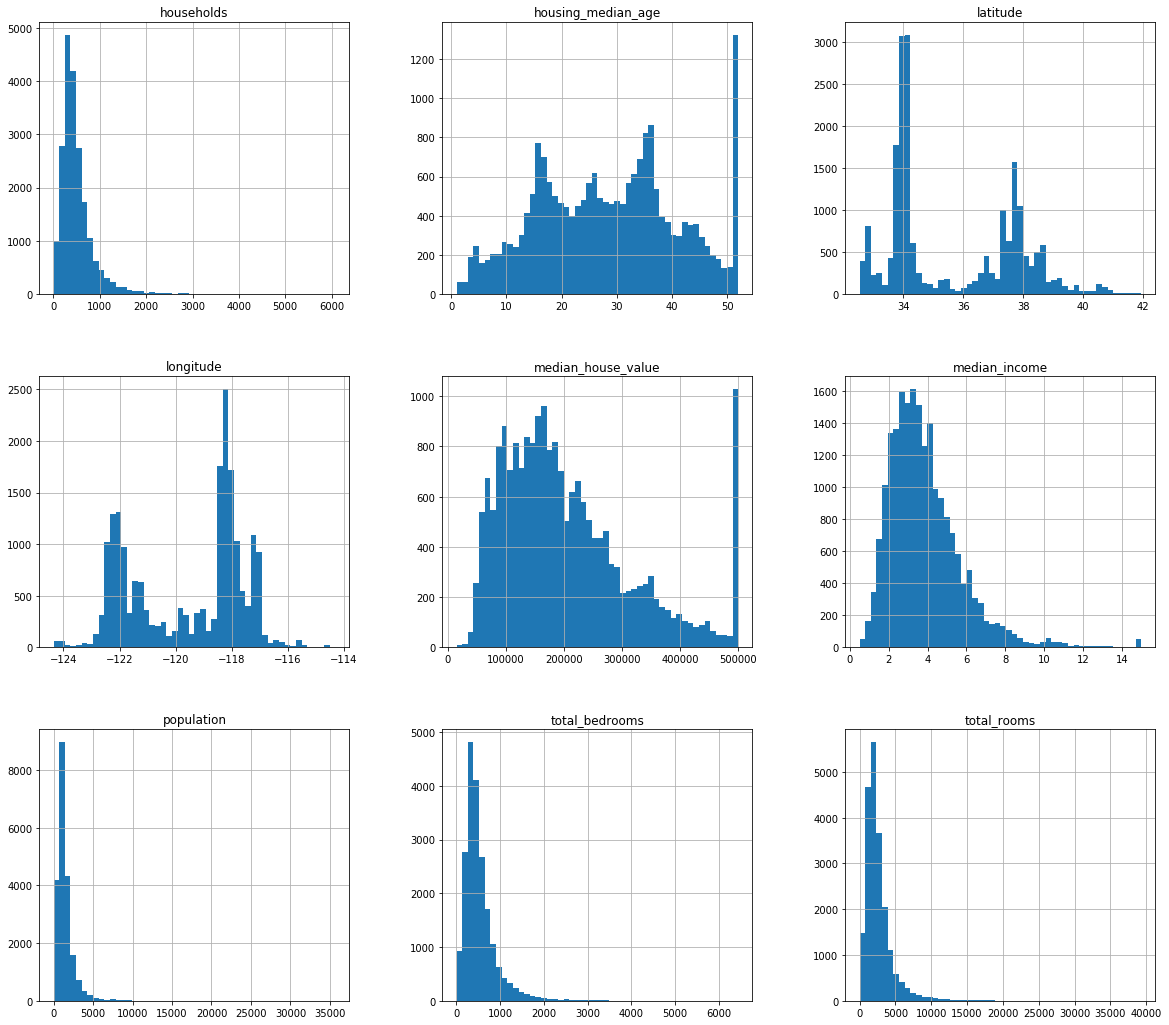

In [5]:
housing.hist(bins=50,figsize=(20,18))
plt.show()

In [6]:
housing["income_cat"] =  np.ceil(housing["median_income"]/1.5)
# putting everything above 5th category as 5th category
housing["income_cat"].where(housing["income_cat"]<5,other=5,inplace=True)

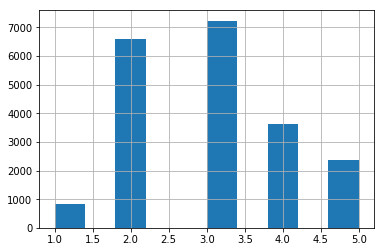

In [7]:
housing["income_cat"].hist()

In [8]:
housing.shape
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=29)

for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [10]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

**as seen above the proportion are maintained in the test set using stratified sampling**
why stratified? because the feature-space are less and also because its a mid-sized dataset & we dont want to miss out any class

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_test= train_test_split(housing,test_size=0.2, random_state=29)

In [13]:
def  income_cat_proposition(data):
    return data["income_cat"].value_counts()/len(data)

In [14]:
compare_props=pd.DataFrame({
    "overall": income_cat_proposition(housing),
    "stratified":income_cat_proposition(strat_test_set),
    "random":income_cat_proposition(test_test) 
}).sort_index()

compare_props["Random %Error"]=100*compare_props["random"]/compare_props["overall"]-100
compare_props["Strat %Error"]=100*compare_props["stratified"]/compare_props["overall"]-100

In [15]:
compare_props

,overall,stratified,random,Random %Error,Strat %Error
1.0,0.039826,0.039729,0.042636,7.055961,-0.243309
2.0,0.318847,0.318798,0.311531,-2.294484,-0.015195
3.0,0.350581,0.350533,0.344719,-1.672195,-0.013820
4.0,0.176308,0.176357,0.181686,3.050289,0.027480
5.0,0.114438,0.114583,0.119428,4.360711,0.127011


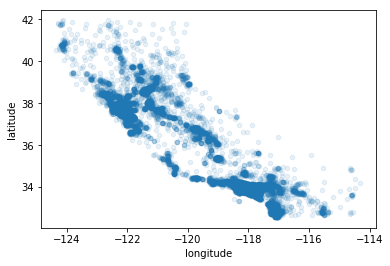

In [17]:
housing=strat_train_set.copy()
housing.plot(kind='scatter',x="longitude",y='latitude',alpha=0.1)

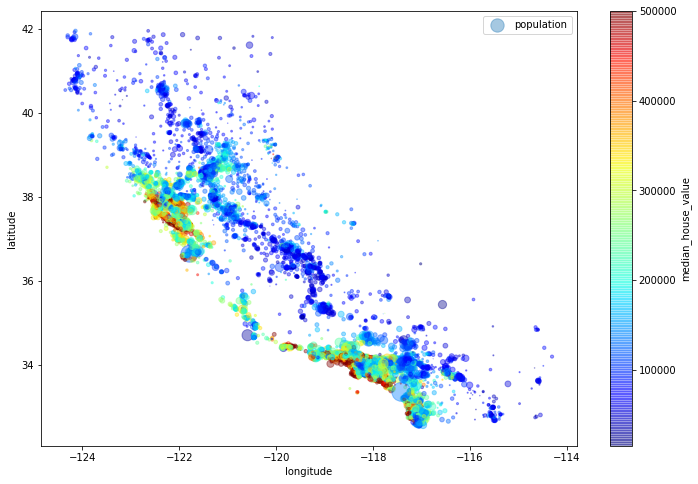

In [21]:
housing.plot(kind='scatter',x="longitude",y='latitude',alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(12,8),
            c="median_house_value",cmap=plt.get_cmap("jet"),sharex=False)
plt.legend()

In [24]:
import matplotlib.image as mpimg

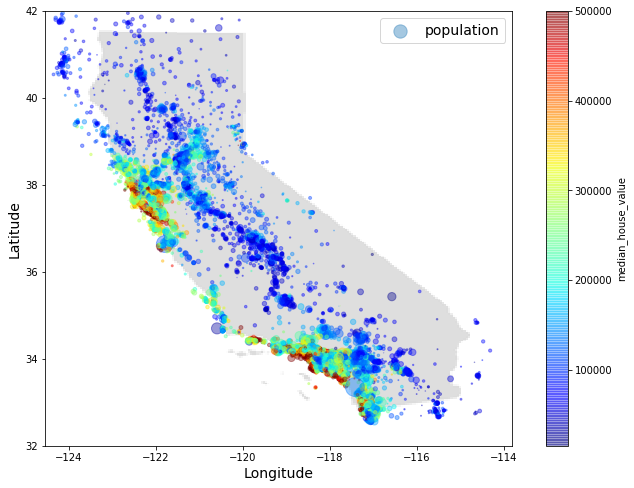

In [34]:

housing.plot(kind='scatter',x="longitude",y='latitude',alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(12,8),
            c="median_house_value",cmap=plt.get_cmap("jet"),sharex=False)


california_img= mpimg.imread("california.png")

plt.imshow(california_img,extent=[-124.55,-113.8,32,42],alpha=0.5,cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude",fontsize=14)
plt.ylabel("Latitude",fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Looking for Correlations
(Pearson's Distance Correlation equation)

In [38]:
#Pandas has corr method for calculating correlation

corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
income_cat            0.645951
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A9E75BCC0>,
      dtype=object)

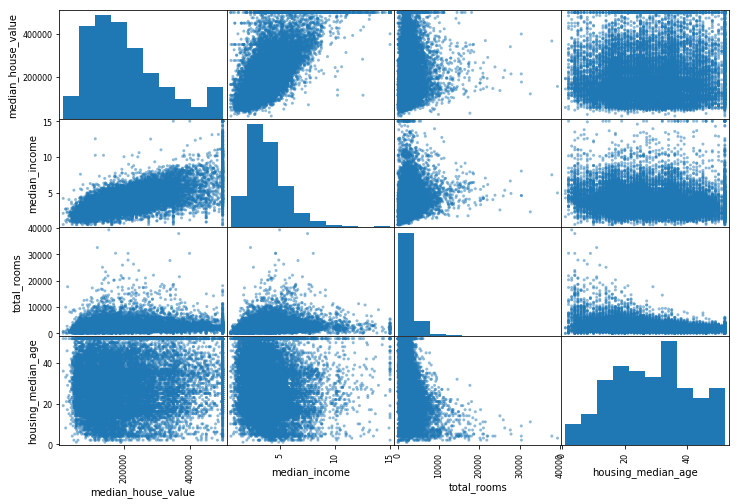

In [44]:
# other approach is to use the scatter plot in a A vs B fashino
# problem with this is that (for N features ,there will be n^2 plots)

imp_attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

from pandas.plotting import scatter_matrix
scatter_matrix(housing[imp_attributes],figsize=(12,8))

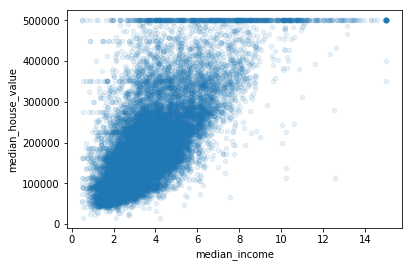

In [48]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

## Feature Engineering

In [59]:
housing["bedroom_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]

In [60]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
income_cat                  0.645951
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedroom_per_room           -0.253572
Name: median_house_value, dtype: float64

***[observation]*** the new `bedrooms_per_room` is highly correlaed but in a reciprocative way to the `median_house value`;
the house with lesser bedroom/room ration will tnd to be more expensive.


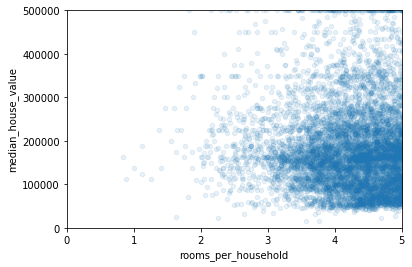

In [66]:
housing.plot(kind="Scatter",x='rooms_per_household',y='median_house_value',alpha=0.1)
plt.axis([0,5,0,500000])
plt.show()

In [67]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,population_per_household,rooms_per_household,bedroom_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,3.006541,3.103875,5.434516,0.212973
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,1.054602,11.603193,2.520743,0.058323
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,0.692308,0.846154,0.100000
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,2.000000,2.433980,4.443478,0.175448
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,3.000000,2.817596,5.230221,0.202964
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,4.000000,3.273248,6.056361,0.239351
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000,1243.333333,141.909091,1.000000


## Preparing the data for ML algos

In [68]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels =strat_train_set["media_house_value"].copy()

### Data Cleansing

In [73]:
sample_incomplte_rows=housing[housing.isnull().any(axis=1)].head()
#when calculating imputing value on your own
median =housing["total_bedrooms"].median()
sample_incomplte_rows["total_bedrooms"].fillna(median,inplace=True)
sample_incomplte_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN,2.0
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN,5.0
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN,3.0
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN,3.0
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN,3.0


In [76]:
# when using sckit-learn's imputer class
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")

In [78]:
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [81]:
#imputer nasically computes across all the attributes. so if you wanna see this across all the attributes just call statistics_ method
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275,    3.     ])

In [84]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275,    3.     ])

using the imputer we created above , transforming the training set by replacing the missing values by the learned medians

In [86]:
X= imputer.transform(housing_num)

In [87]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [88]:
#cross check for missing values
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat


In [89]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,3.0
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,5.0
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,3.0
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,2.0
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399,2.0


### handling categorical values

In [92]:
housing_cat =housing["ocean_proximity"]
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [93]:
# using pandas's own factoorize() method to convert them into categorical features
housing_cat_encoded,housing_categories= housing_cat.factorize()

In [94]:
  housing_cat_encoded[:10]    

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [95]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [116]:
# using sklearn.s OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()
housing_cat_1hot= encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [101]:
housing_cat_1hot.shape

(1, 16512)

In [104]:
#since 1 hot encoder returns a sparse matrix ,need to change it to a dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

## Custom Transformations

In [105]:
from sklearn.base import BaseEstimator,TransformerMixin
# column indexes
room_ix,bedrooms_ix,household_ix,population_ix=3,4,6,5
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
        
    def fit(self,X,y=None):
        return self #nothing to do here
    def transform(self,X,y=None):
        rooms_per_household=X[:,room_ix]/X[:,household_ix]
        population_per_houshold=X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room =X[:,bedrooms_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_houshold,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_houshold]

In [106]:
attr_adder =CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [109]:
housing_extra_attribs =pd.DataFrame(housing_extra_attribs,columns=list(housing.columns)+["rooms_per_householde","population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_householde,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,3,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,5,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,3,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,2,4.25359,2.60862


## Setting up Pipelin for all the preprocessing 

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline= Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

housing_num_tr=num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [112]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [118]:
# complete PipeLine

num_attribs= list(housing_num.columns)
cat_attribs=["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector",DataFrameSelector(num_attribs)),
    ("imputer",SimpleImputer(strategy='median')),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])
cat_pipline =Pipeline([
    ("selector",DataFrameSelector(cat_attribs)),
    ("cat_encoder",OneHotEncoder(sparse=False))
    
])

In [119]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipline)
])

In [120]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Selecting & Training Models

In [121]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
#trying the full pipeline on a few training instances
some_data= housing.iloc[:5]
some_labels= housing_labels[:5]

somde_data_prepared=full_pipeline.transform(some_data)

In [123]:
print("Prediction: ",lin_reg.predict(somde_data_prepared))
print("Actual: ",list(some_labels))

Prediction:  [209965.63770984 449160.42980268 257107.6564536  175159.50126061
 111598.85863215]
Actual:  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [127]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)

lin_mse= mean_squared_error(housing_labels,housing_prediction)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

67723.2359679643

In [128]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [130]:
housing_prediction= tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

0.0

## Cross Validation 

In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,cv=10,scoring="neg_mean_squared_error")

tree_rmse_scores= np.sqrt(-scores)


In [138]:
def display_scores(scores):
    print("Scores: ",scores)
    print("mean: ",scores.mean())
    print("std deviation: ",scores.std())  

In [139]:
display_scores(tree_rmse_scores)

Scores:  [69834.0578384  68733.56624929 69075.37293256 72443.28188849
 70061.56088344 69509.03679846 70548.98512578 71059.92403113
 68349.9420216  69704.80864909]
mean:  69932.05364182372
std deviation:  1135.3093527308415


In [140]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,cv=10,scoring="neg_mean_squared_error")
lin_rmse_scores= np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores:  [67349.57812698 68964.08664168 65252.63935511 67426.71292559
 66214.30255666 66674.22407807 67438.03782191 69779.12424999
 66501.10705237 74629.46606683]
mean:  68022.92788751984
std deviation:  2526.813912987667


In [141]:
from sklearn.ensemble import RandomForestRegressor

forest_reg= RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared,housing_labels)

C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=29, verbose=0, warm_start=False)

In [143]:
housing_pre= forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,cv=10,scoring="neg_mean_squared_error")

forest_rmse_scores= np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [50741.47908893 53748.91689677 49573.99438616 51459.00852688
 51519.72198776 52314.77179273 51632.09825997 51018.33394301
 51046.12173236 55347.45601727]
mean:  51840.190263185774
std deviation:  1552.7228475582983


## Fine Tunning Model:

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]}
]

rf_reg= RandomForestRegressor()
grid_search= GridSearchCV(rf_reg,param_grid,cv=5,scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [146]:
#to get the best combination of hyperparameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [147]:
#to get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [148]:
cv_res= grid_search.cv_results_
for mean_score,params in zip(cv_res["mean_test_score"],cv_res["params"]):
    print(np.sqrt(-mean_score),params)

62408.43056339053 {'max_features': 2, 'n_estimators': 3}
55562.872112199824 {'max_features': 2, 'n_estimators': 10}
52462.89845582013 {'max_features': 2, 'n_estimators': 30}
60855.322756555426 {'max_features': 4, 'n_estimators': 3}
53346.46035900815 {'max_features': 4, 'n_estimators': 10}
50794.29882327347 {'max_features': 4, 'n_estimators': 30}
58744.42147655236 {'max_features': 6, 'n_estimators': 3}
52278.249601427124 {'max_features': 6, 'n_estimators': 10}
50139.447577923835 {'max_features': 6, 'n_estimators': 30}
58863.29604127409 {'max_features': 8, 'n_estimators': 3}
51984.52320310039 {'max_features': 8, 'n_estimators': 10}
50319.29089554839 {'max_features': 8, 'n_estimators': 30}
61044.538475150235 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53894.98480996339 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
51744.631944849316 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
59883.00863433578 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [149]:
pd.DataFrame(grid_search.cv_results_)

C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KINJAL\.conda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\KINJAL\.conda\envs\py3\li

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117262,0.011200,0.006447,3.443147e-06,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.061286e+09,-3.890590e+09,...,-3.894812e+09,1.561927e+08,21,-1.119400e+09,-1.077906e+09,-9.656718e+08,-9.951816e+08,-1.051857e+09,-1.042003e+09,5.548903e+07
1,0.400767,0.005600,0.017450,1.862348e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.223140e+09,-2.913064e+09,...,-3.087233e+09,1.221486e+08,14,-5.884351e+08,-5.595578e+08,-5.807697e+08,-6.023791e+08,-5.547597e+08,-5.771802e+08,1.782005e+07
2,1.179792,0.007844,0.049599,4.456375e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.706256e+09,-2.665125e+09,...,-2.752356e+09,1.072063e+08,10,-4.266053e+08,-4.245099e+08,-4.171527e+08,-4.179696e+08,-4.160820e+08,-4.204639e+08,4.253771e+06
3,0.196119,0.002360,0.006446,2.145237e-06,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.848540e+09,-3.716005e+09,...,-3.703370e+09,1.104116e+08,19,-1.013545e+09,-1.040078e+09,-9.709935e+08,-9.708211e+08,-9.441277e+08,-9.879130e+08,3.427452e+07
4,0.639429,0.005144,0.016374,1.617264e-03,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.809125e+09,-2.662980e+09,...,-2.845845e+09,1.432227e+08,12,-5.331831e+08,-5.074675e+08,-5.089600e+08,-5.111722e+08,-5.236234e+08,-5.168812e+08,9.951532e+06
5,1.934982,0.023667,0.050394,3.965980e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.595503e+09,-2.523298e+09,...,-2.580061e+09,4.276530e+07,5,-4.030682e+08,-4.034158e+08,-4.017353e+08,-4.097696e+08,-3.862746e+08,-4.008527e+08,7.801153e+06
6,0.271608,0.008837,0.006449,4.768372e-07,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.429500e+09,-3.476990e+09,...,-3.450907e+09,3.779216e+07,15,-9.131234e+08,-9.036192e+08,-8.881848e+08,-9.085991e+08,-9.004789e+08,-9.028011e+08,8.483690e+06
7,0.891935,0.016014,0.017742,2.211879e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.729883e+09,-2.670700e+09,...,-2.733015e+09,4.154717e+07,9,-5.243665e+08,-5.152857e+08,-5.153405e+08,-4.910738e+08,-4.646112e+08,-5.021355e+08,2.178052e+07
8,2.728584,0.063772,0.053773,9.138922e-03,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.528318e+09,-2.422289e+09,...,-2.513964e+09,7.809763e+07,2,-3.827303e+08,-3.869659e+08,-3.755021e+08,-3.905250e+08,-3.736714e+08,-3.818789e+08,6.471223e+06
9,0.348261,0.003714,0.006283,2.116047e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.556989e+09,-3.370318e+09,...,-3.464888e+09,7.642654e+07,16,-8.916240e+08,-9.384979e+08,-8.208902e+08,-8.895930e+08,-8.361110e+08,-8.753432e+08,4.233425e+07


In [152]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs={
    'n_estimators': randint(low=1,high=200),
    'max_features':randint(low=1,high=8)
}

rf_reg = RandomForestRegressor(random_state=29)
rnd_search = RandomizedSearchCV(rf_reg,param_distributions=params_distibs,n_iter=10,cv=5,scoring="neg_mean_squared_error",random_state=29)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=29, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023AAE8FEF60>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023AAE8FEA58>},
          pre_dispatch='2*n_jobs', random_state=29, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [153]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=152, n_jobs=None, oob_score=False, random_state=29,
           verbose=0, warm_start=False)

In [154]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 152}